In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

import fair_var

In [2]:
data = pd.read_csv("../data/chirper-happiness.csv")

# Explore Data

In [3]:
data

,Id2,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
0,6037101110,1244,2319,19.4,5.863903,68938
1,6037101122,304,2175,27.2,5.963174,120490
2,6037101210,2434,2078,16.6,5.623312,54481
3,6037101220,509,1370,19.8,5.687386,51880
4,6037101300,365,3116,31.0,5.687331,90933
...,...,...,...,...,...,...
2105,6037920338,738,2728,59.8,5.877809,177556
2106,6037920339,808,3367,55.5,5.888279,162243
2107,6037930101,27,98,64.9,5.713390,61578
2108,6037930200,117,240,30.6,5.820676,117289


(array([1.000e+00, 5.000e+00, 1.040e+02, 1.108e+03, 7.890e+02, 9.800e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.11      , 5.29313889, 5.47627778, 5.65941667, 5.84255556,
        6.02569444, 6.20883333, 6.39197222, 6.57511111, 6.75825   ,
        6.94138889]),
 <a list of 10 Patch objects>)

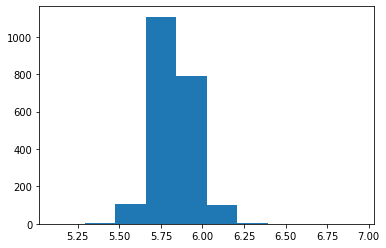

In [4]:
plt.hist(data["meanvalence"])

In [5]:
data["meanvalence"].mean()

5.828721131636487

# 1. Ground Truth Model

In [6]:
data = data.drop("Id2", axis = 1)

In [7]:
## standard sclader
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [8]:
data

,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
0,-0.331174,1.337270,-0.456639,0.308874,-0.217651
1,-1.187497,1.192530,-0.078692,1.180404,0.977701
2,0.752895,1.095031,-0.592312,-1.803357,-0.552870
3,-1.000745,0.383390,-0.437257,-1.240830,-0.613180
4,-1.131927,2.138369,0.105436,-1.241314,0.292354
...,...,...,...,...,...
2105,-0.792131,1.748374,1.500933,0.430958,2.300908
2106,-0.728362,2.390660,1.292577,0.522876,1.945841
2107,-1.439839,-0.895152,1.748052,-1.012526,-0.388309
2108,-1.357850,-0.752422,0.086054,-0.070633,0.903479


In [9]:
## correlation
data.corr()

,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
totalGroup1,1.000000,-0.503950,-0.729305,-0.361185,-0.507290
totalGroup2,-0.503950,1.000000,0.726215,0.335692,0.585684
percent_bachelorPlus,-0.729305,0.726215,1.000000,0.457267,0.752844
meanvalence,-0.361185,0.335692,0.457267,1.000000,0.311013
households_meanIncome,-0.507290,0.585684,0.752844,0.311013,1.000000


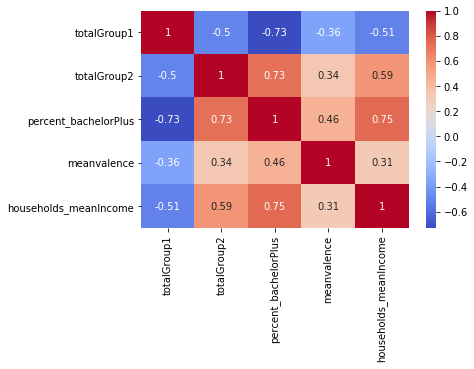

In [10]:
sns.heatmap(data.corr(), cmap= 'coolwarm', annot = True)

# Ground Truth Model

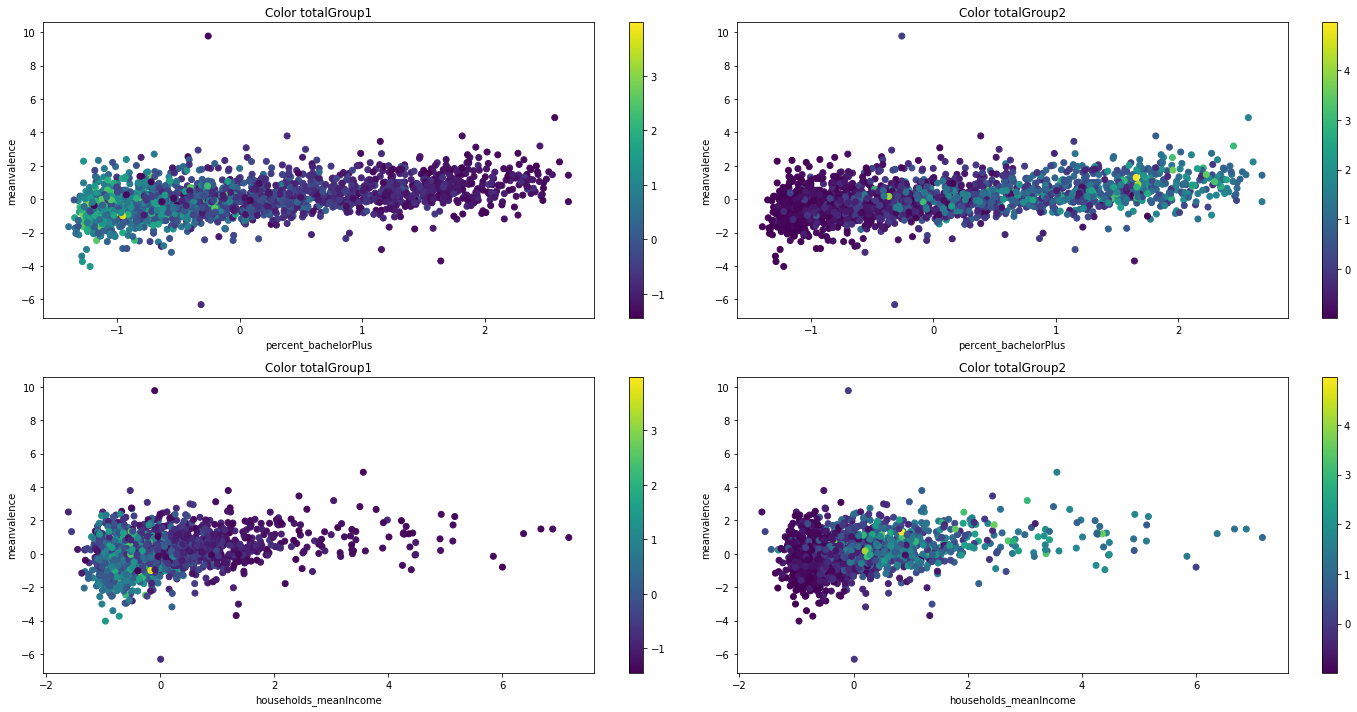

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(data["percent_bachelorPlus"], data["meanvalence"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1")
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(data["percent_bachelorPlus"], data["meanvalence"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("meanvalence")
plt.title("Color totalGroup2")
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(data["households_meanIncome"], data["meanvalence"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1")
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(data["households_meanIncome"], data["meanvalence"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup2")
plt.colorbar()

plt.tight_layout()

# 2. Ethnic Group Aware Model

In [12]:
X = data.drop(['meanvalence'], axis=1)
y = data["meanvalence"]
X = sm.add_constant(X)

In [13]:
## train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [14]:
## linear regression model
linreg = sm.OLS(y_train, X_train).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:            meanvalence   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.17e-83
Time:                        14:30:34   Log-Likelihood:                -2176.4
No. Observations:                1688   AIC:                             4363.
Df Residuals:                    1683   BIC:                             4390.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

In [15]:
data["ypred"] = linreg.predict(X)

#### apply scaler to 5.8 meanvalence

In [16]:
scaler.transform([[0,0,0,5.8,0]])

array([[-1.46443535, -0.99365623, -1.39666077, -0.25215218, -1.81613717]])

In [17]:
scaled_5_8 = -0.25215218

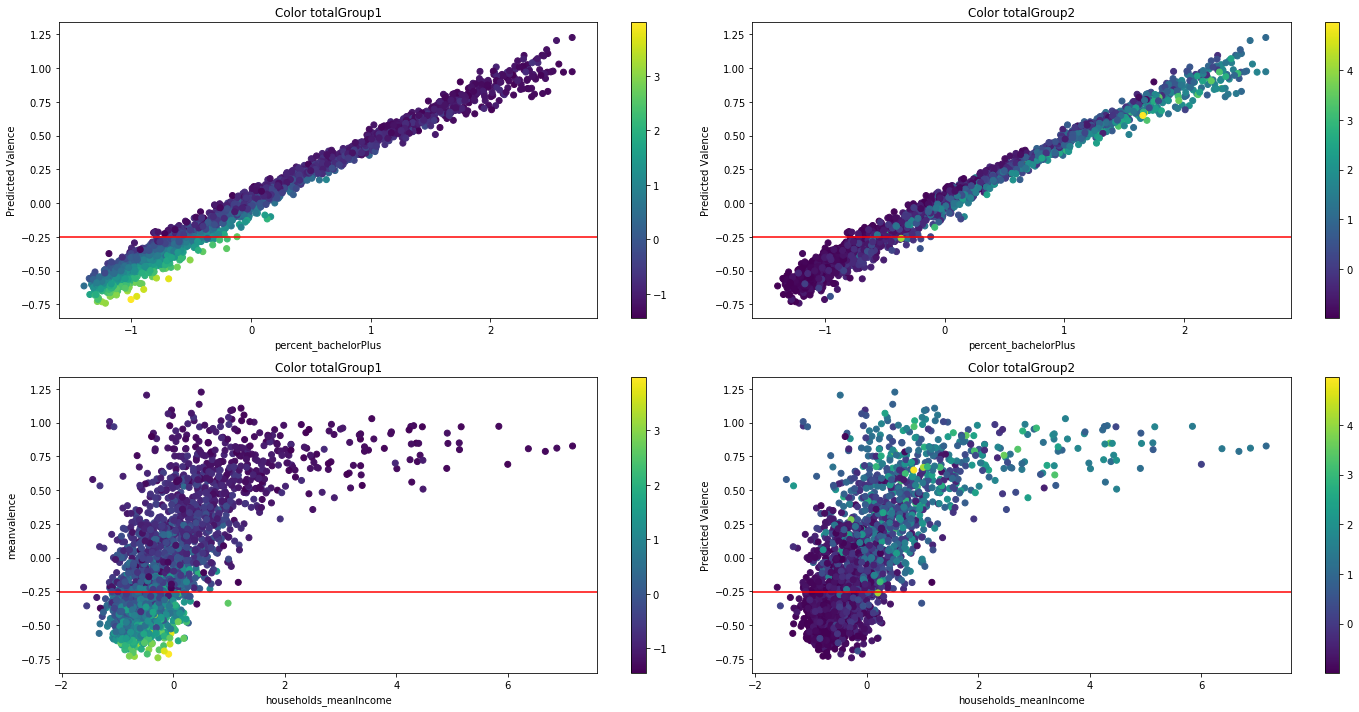

In [18]:
## Plot Ethnic Group Aware Model
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(data["percent_bachelorPlus"], data["ypred"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup1")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(data["percent_bachelorPlus"], data["ypred"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(data["households_meanIncome"], data["ypred"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(data["households_meanIncome"], data["ypred"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()
plt.tight_layout()

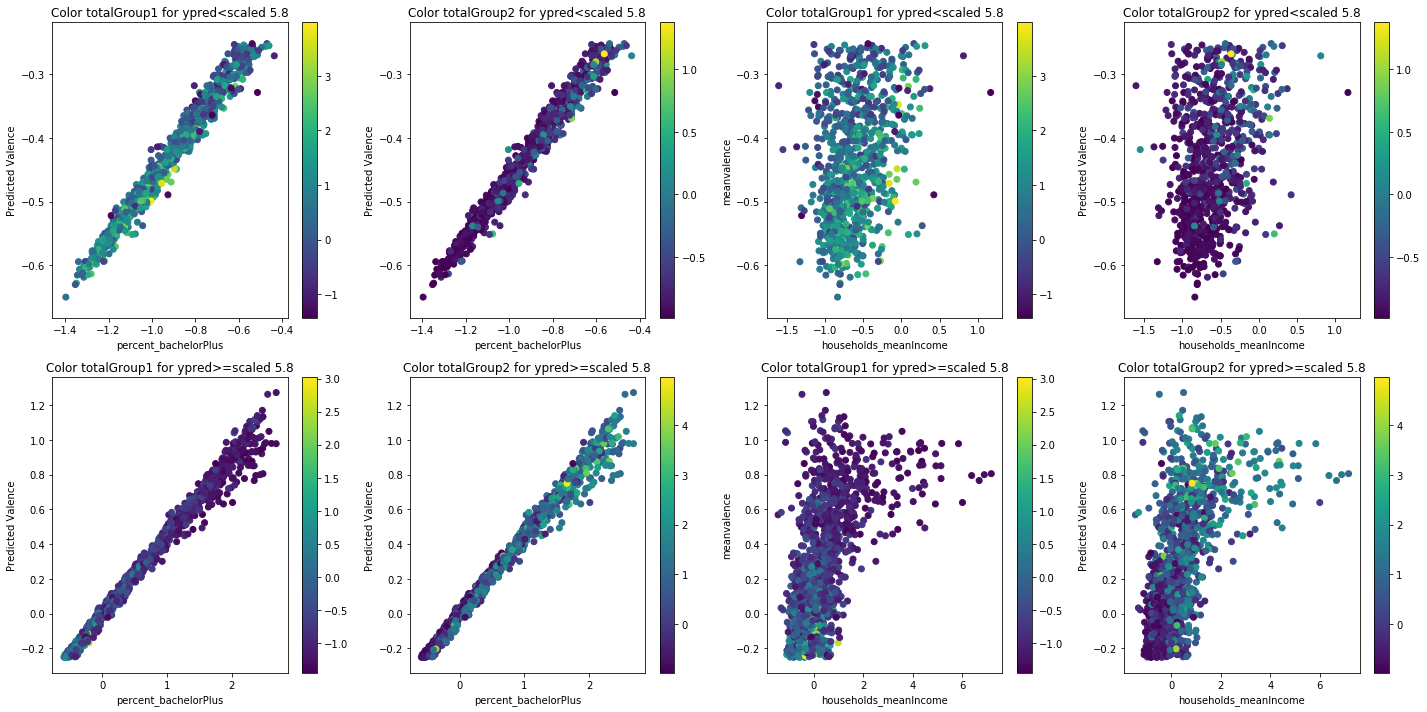

In [53]:
## splitted plot based on y_pred scaled 5.8
data1 = data[data["ypred"]<scaled_5_8]
data2 = data[data["ypred"]>=scaled_5_8]

plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
plt.scatter(data1["percent_bachelorPlus"], data1["ypred"], c = data1["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup1 for ypred<scaled 5.8")
plt.colorbar()

plt.subplot(2,4,2)
plt.scatter(data1["percent_bachelorPlus"], data1["ypred"], c = data1["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2 for ypred<scaled 5.8")
plt.colorbar()


plt.subplot(2, 4, 3)
plt.scatter(data1["households_meanIncome"], data1["ypred"], c = data1["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1 for ypred<scaled 5.8")
plt.colorbar()

plt.subplot(2,4,4)
plt.scatter(data1["households_meanIncome"], data1["ypred"], c = data1["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2 for ypred<scaled 5.8")
plt.colorbar()


plt.subplot(2, 4, 5)
plt.scatter(data2["percent_bachelorPlus"], data2["ypred"], c = data2["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup1 for ypred>=scaled 5.8")
plt.colorbar()

plt.subplot(2,4,6)
plt.scatter(data2["percent_bachelorPlus"], data2["ypred"], c = data2["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2 for ypred>=scaled 5.8")
plt.colorbar()


plt.subplot(2, 4, 7)
plt.scatter(data2["households_meanIncome"], data2["ypred"], c = data2["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1 for ypred>=scaled 5.8")
plt.colorbar()

plt.subplot(2,4,8)
plt.scatter(data2["households_meanIncome"], data2["ypred"], c = data2["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2 for ypred>=scaled 5.8")
plt.colorbar()


plt.tight_layout()

## Correlation, Heatmap

In [20]:
cor_data_2 = data[["totalGroup1", "totalGroup2", "percent_bachelorPlus", "households_meanIncome", "ypred"]]

In [21]:
cor_data_2.corr()

,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome,ypred
totalGroup1,1.000000,-0.503950,-0.729305,-0.507290,-0.798574
totalGroup2,-0.503950,1.000000,0.726215,0.585684,0.694424
percent_bachelorPlus,-0.729305,0.726215,1.000000,0.752844,0.991001
households_meanIncome,-0.507290,0.585684,0.752844,1.000000,0.692935
ypred,-0.798574,0.694424,0.991001,0.692935,1.000000


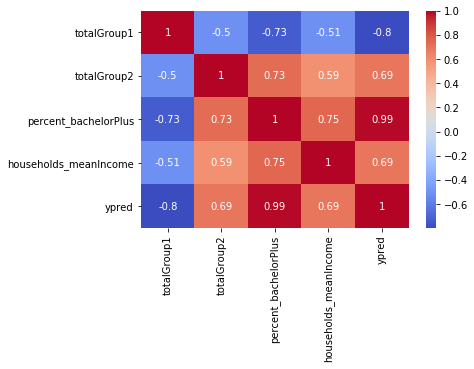

In [23]:
sns.heatmap(cor_data_2.corr(), cmap= 'coolwarm', annot = True)

In [24]:
X = data.drop(['meanvalence'], axis=1)
y = data["meanvalence"]

In [25]:
data

,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome,ypred
0,-0.331174,1.337270,-0.456639,0.308874,-0.217651,-0.205551
1,-1.187497,1.192530,-0.078692,1.180404,0.977701,-0.033115
2,0.752895,1.095031,-0.592312,-1.803357,-0.552870,-0.319859
3,-1.000745,0.383390,-0.437257,-1.240830,-0.613180,-0.116880
4,-1.131927,2.138369,0.105436,-1.241314,0.292354,0.061944
...,...,...,...,...,...,...
2105,-0.792131,1.748374,1.500933,0.430958,2.300908,0.571921
2106,-0.728362,2.390660,1.292577,0.522876,1.945841,0.480947
2107,-1.439839,-0.895152,1.748052,-1.012526,-0.388309,0.897077
2108,-1.357850,-0.752422,0.086054,-0.070633,0.903479,0.087537


# 3. Ethnic Group Blind Model

In [26]:
X = data.drop(['meanvalence', 'totalGroup1', 'totalGroup2', "ypred"], axis=1)
y = data["meanvalence"]
X = sm.add_constant(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [28]:
linreg = sm.OLS(y_train, X_train).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:            meanvalence   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.85e-84
Time:                        14:30:48   Log-Likelihood:                -2179.0
No. Observations:                1688   AIC:                             4364.
Df Residuals:                    1685   BIC:                             4380.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

In [29]:
data["ypred"] = linreg.predict(X)

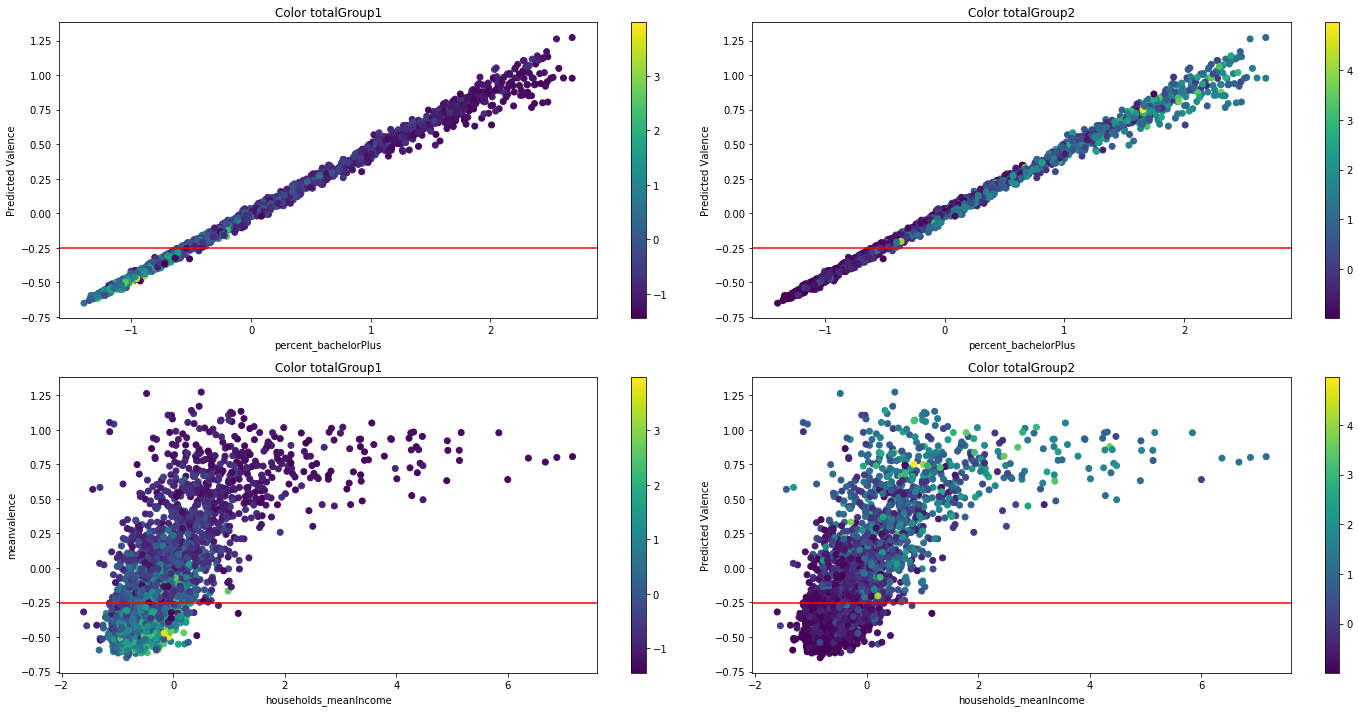

In [30]:
## Plot Ethnic Group Blind Model
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(data["percent_bachelorPlus"], data["ypred"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup1")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(data["percent_bachelorPlus"], data["ypred"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(data["households_meanIncome"], data["ypred"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(data["households_meanIncome"], data["ypred"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=scaled_5_8, color='r', linestyle='-')
plt.colorbar()

plt.tight_layout()

In [31]:
cor_data_3 = data[["totalGroup1", "totalGroup2", "percent_bachelorPlus", "households_meanIncome", "ypred"]]

In [32]:
cor_data_3.corr()

,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome,ypred
totalGroup1,1.000000,-0.503950,-0.729305,-0.507290,-0.732047
totalGroup2,-0.503950,1.000000,0.726215,0.585684,0.719060
percent_bachelorPlus,-0.729305,0.726215,1.000000,0.752844,0.996732
households_meanIncome,-0.507290,0.585684,0.752844,1.000000,0.697211
ypred,-0.732047,0.719060,0.996732,0.697211,1.000000


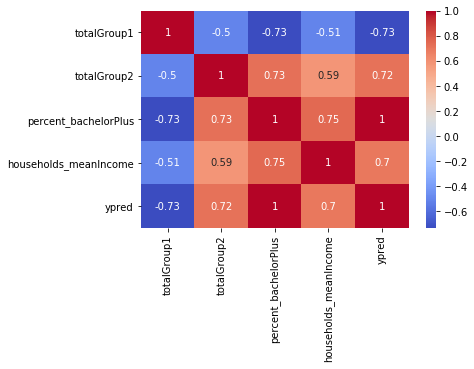

In [34]:
sns.heatmap(cor_data_3.corr(), cmap= 'coolwarm', annot = True)

# 4. Fair Model

In [43]:
## used first function of fair_var.py
data["meanvalence_fair"] = fair_var.gen_latent_fast(cor_data_2.loc[:, cor_data_2.columns != "Id2"], ["totalGroup1", "totalGroup2"], "ypred")


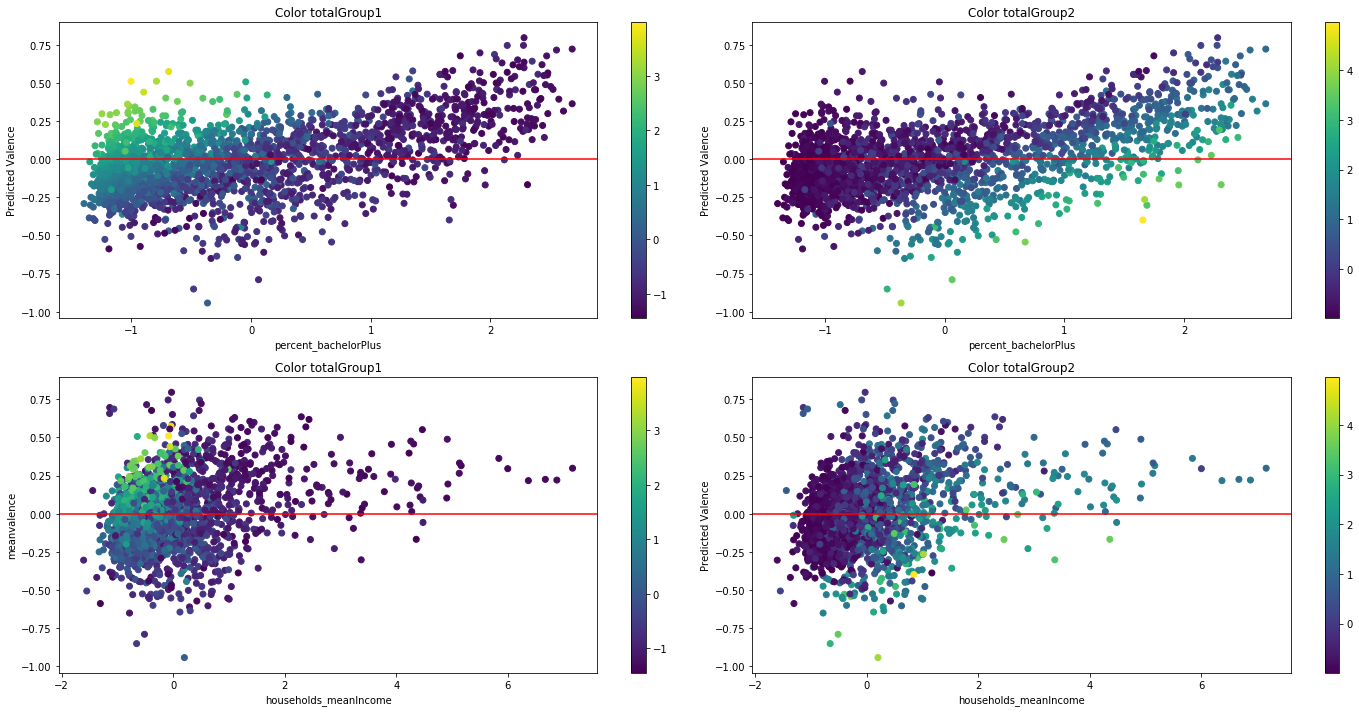

In [44]:
## Plot Fair Model
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(data["percent_bachelorPlus"], data["meanvalence_fair"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup1")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(data["percent_bachelorPlus"], data["meanvalence_fair"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(data["households_meanIncome"], data["meanvalence_fair"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(data["households_meanIncome"], data["meanvalence_fair"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()

plt.tight_layout()

In [54]:
## used second function of fair_var.py with lbd = 0 ==> Completely fair var
data["meanvalence_fair"] = fair_var.gen_latent_nonparam_regula(cor_data_2.loc[:, cor_data_2.columns != "Id2"], ["totalGroup1", "totalGroup2"], "ypred" , lbd =1)



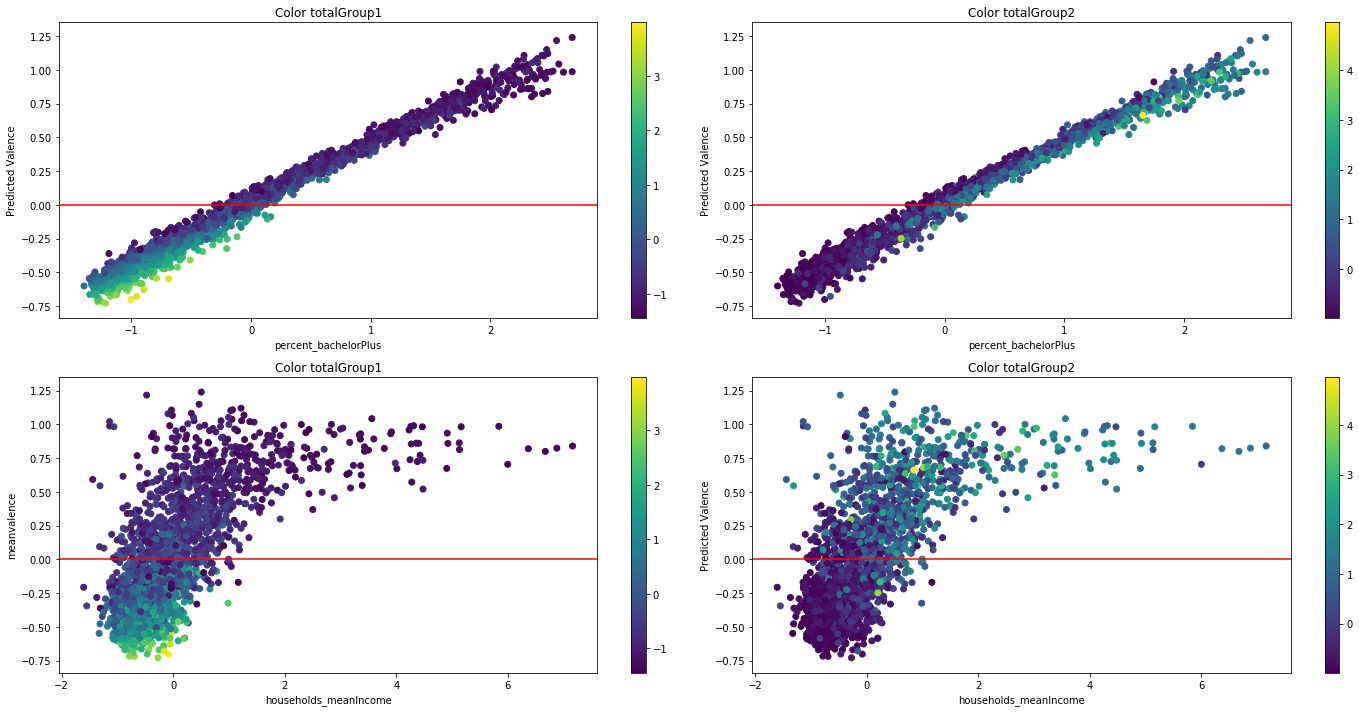

In [55]:
## Plot Fair Model
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(data["percent_bachelorPlus"], data["meanvalence_fair"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup1")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(data["percent_bachelorPlus"], data["meanvalence_fair"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("percent_bachelorPlus")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(data["households_meanIncome"], data["meanvalence_fair"], c = data["totalGroup1"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("meanvalence")
plt.title("Color totalGroup1")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(data["households_meanIncome"], data["meanvalence_fair"], c = data["totalGroup2"], cmap = 'viridis')
plt.xlabel("households_meanIncome")
plt.ylabel("Predicted Valence")
plt.title("Color totalGroup2")
plt.axhline(y=0, color='r', linestyle='-')
plt.colorbar()

plt.tight_layout()

In [48]:
## symmetry based on y = 0

In [49]:
cor_data = data[["totalGroup1", "totalGroup2", "percent_bachelorPlus", "households_meanIncome", "meanvalence_fair"]]

In [50]:
cor_data.corr()

,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome,meanvalence_fair
totalGroup1,1.000000e+00,-5.039499e-01,-0.729305,-0.507290,4.216494e-16
totalGroup2,-5.039499e-01,1.000000e+00,0.726215,0.585684,-3.174655e-16
percent_bachelorPlus,-7.293050e-01,7.262154e-01,1.000000,0.752844,5.385862e-01
households_meanIncome,-5.072898e-01,5.856842e-01,0.752844,1.000000,3.185891e-01
meanvalence_fair,4.216494e-16,-3.174655e-16,0.538586,0.318589,1.000000e+00


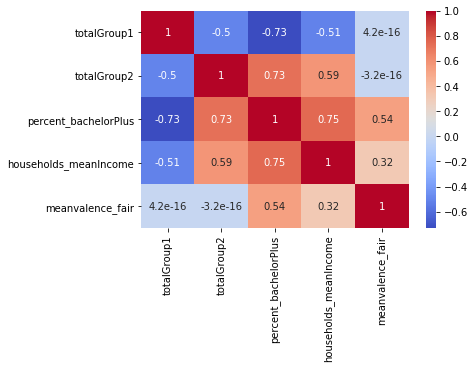

In [52]:
sns.heatmap(cor_data.corr(), cmap= 'coolwarm', annot = True)

In [36]:
## different from the previous heatmaps. Meanvalence_fair has almost no correlation between other features.